In [ ]:
# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataconda install tensorflow Generator
from matplotlib import pyplot
# load the image
img = load_img('/content/20051020_43906_0100_PP.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/20051020_43906_0100_PP.png'

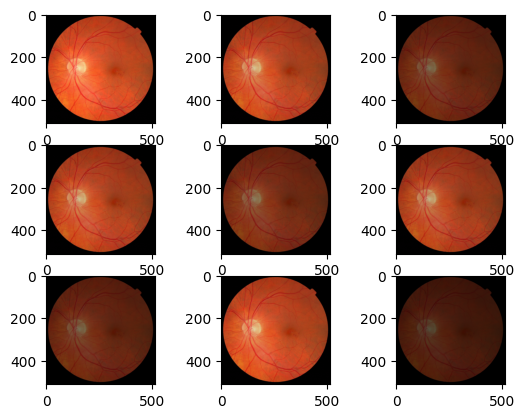

In [ ]:
# example of brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/20051020_43906_0100_PP.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
brightness_range=[0.2,1.0]
                      )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:

from keras.preprocessing import image
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
def image_preprocessing(image, label):
    image = tf.image.resize(image, (512, 512), method=tf.image.ResizeMethod.BILINEAR, preserve_aspect_ratio=True)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

PATH = "./10"
ds = tf.keras.preprocessing.image_dataset_from_directory(PATH,
                                  image_size=(512,512),
                                  seed=42, shuffle=True, batch_size=16)
dataset = ds.map(image_preprocessing)
print(dataset)

Found 3763 files belonging to 1 classes.
<_MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


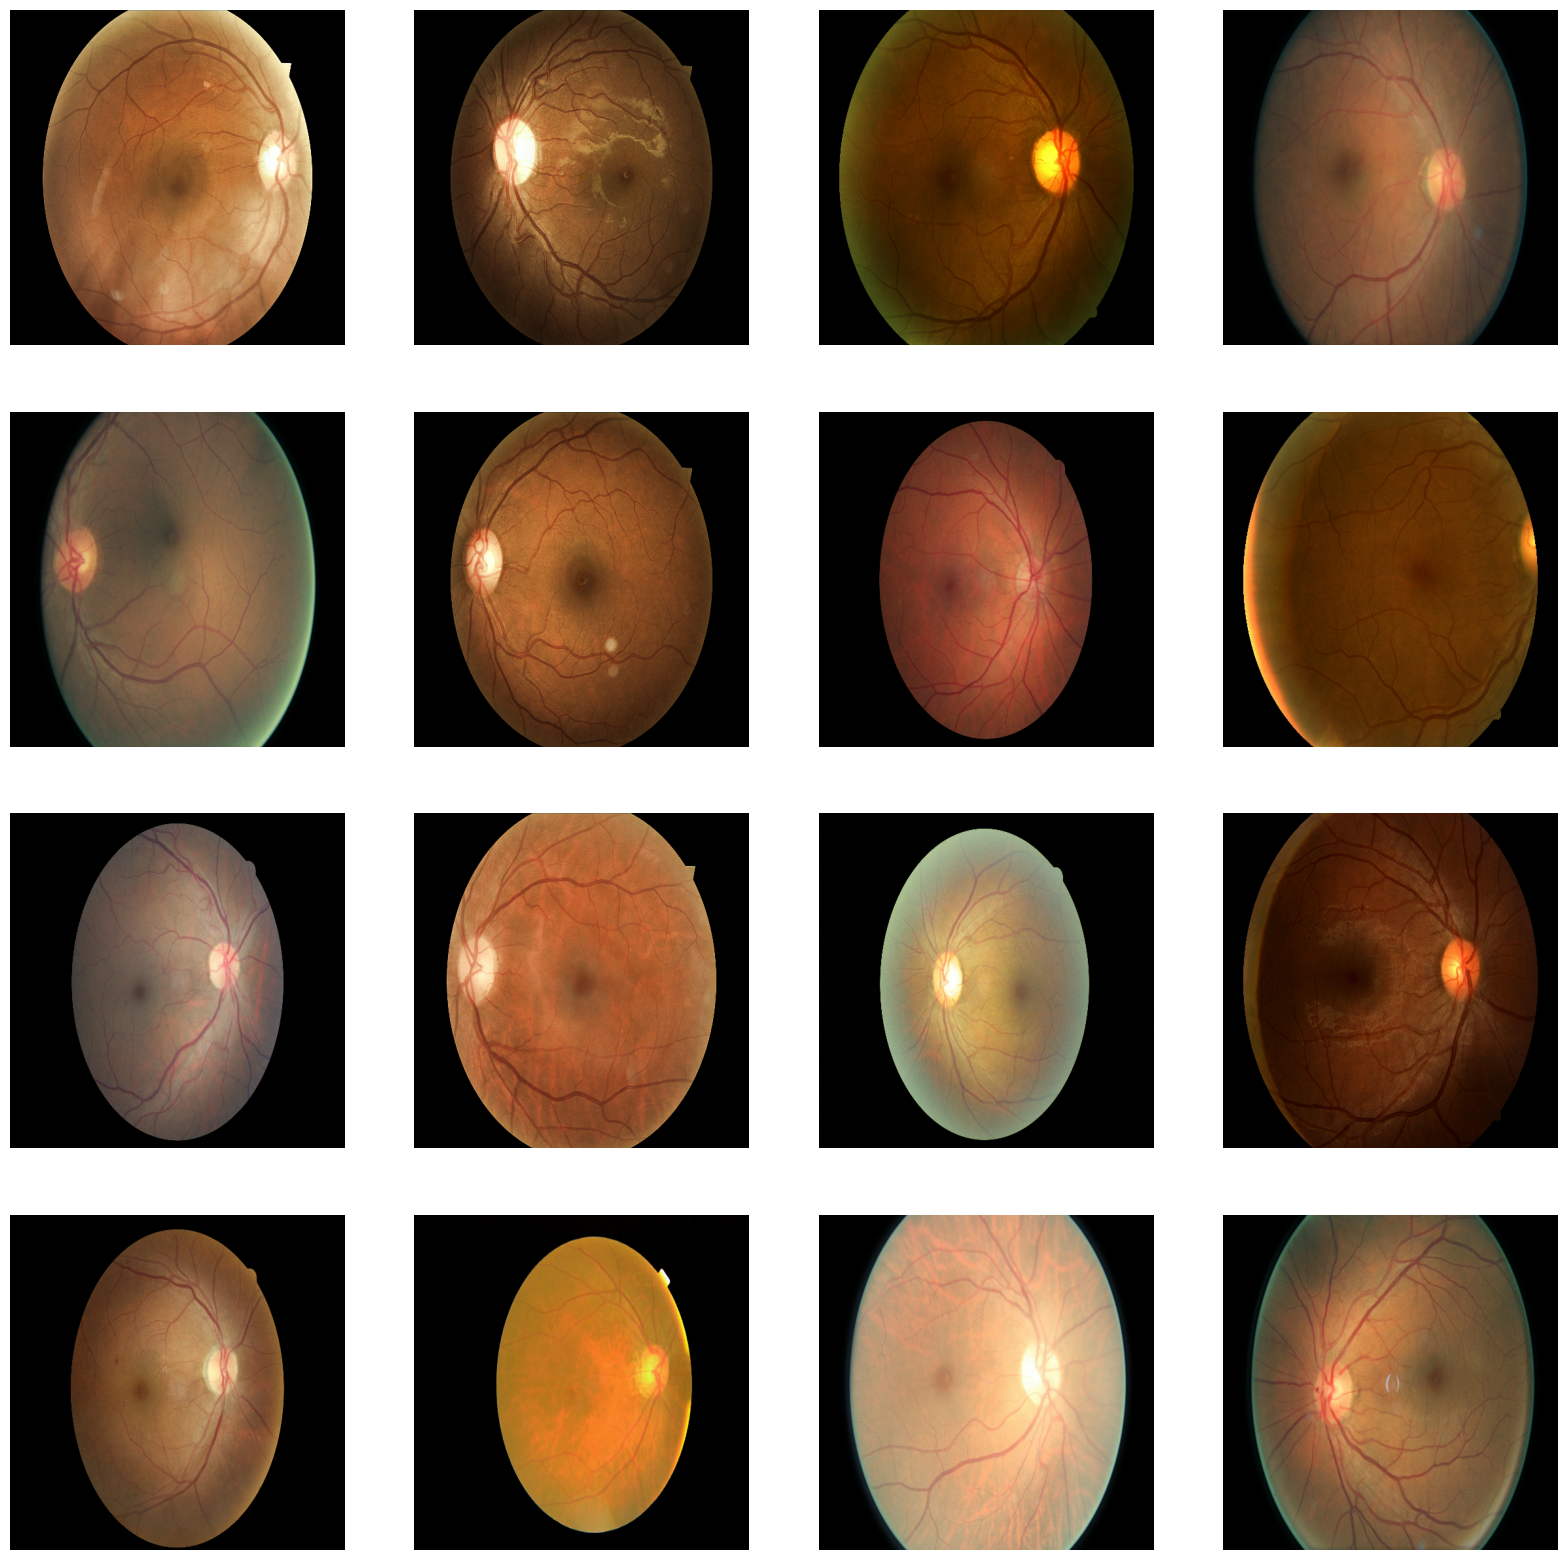

In [ ]:
import matplotlib.pyplot as plt
for image,label in dataset.take(1):
    plt.figure(figsize=(20,20))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.axis("off")




In [ ]:
img = image.load_img('/content/20051020_43906_0100_PP.png')
img = image.img_to_array(img)


NameError: name 'image' is not defined

In [41]:
import tensorflow as tf
from tensorflow import keras
# from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

def adjust_contrast_and_saturation(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Adjust saturation
    hsv[..., 1] = hsv[..., 1] * np.random.uniform(0.5,1.5)

    # Adjust contrast
    alpha = np.random.uniform(0.5, 1.5)
    beta = np.random.uniform(-50, 50)
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Convert back to RGB color space
    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    return image
def preprocessing_contrast_and_brightness(image):
    image =  tf.image.resize(image,(512,512),method=tf.image.ResizeMethod.BILINEAR,preserve_aspect_ratio=True)
    image = tf.image.flip_left_right(image)
    image = tf.image.stateless_random_hue(image,0.1,seed=[1234,5678])
    return image

datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    brightness_range=[0.3, 0.5],
    # zca_epsilon=True,
    preprocessing_function = preprocessing_contrast_and_brightness
)
#Creating ImageDataGenerator object for testing
# test_datagen = keras.preprocessing.image.ImageDataGenerator(
# rescale=1./255
# )



In [ ]:
train_generator = trdatagen.flow_from_directory(
'./10',
target_size = (512,512),
batch_size=16,
class_mode = 'binary'
)

Found 3763 images belonging to 1 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
'./10',
target_size=(512,512),
batch_size = 32,
class_mode = 'binary'
)

Found 3763 images belonging to 1 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(512, 512, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Changed 'softmax' to 'sigmoid' for binary classification
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.fit(
train_generator,
steps_per_epoch=5,
epochs=1,
validation_data=validation_generator,
validation_steps=5,
)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1286: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - accuracy: 0.5557 - loss: 98.4600 - val_accuracy: 0.4625 - val_loss: 40.1327


In [2]:
required_directory = './10'
final_image_generator = datagen.flow_from_directory(
required_directory,
target_size = (512,512),
class_mode = None,
shuffle = False
)

FileNotFoundError: [Errno 2] No such file or directory: './10'

In [47]:
# from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image

required_directory = './10'
final_image_generator = datagen.flow_from_directory(
    required_directory,
    target_size=(512,512),
    class_mode=None,
    shuffle=False
)

output_directory = './4_08'
if  os.path.isdir(output_directory)==False:
    os.makedirs(output_directory)
    print("dir has been made")
batch_size = 32

# Extract filenames from the final_image_generator
filenames = final_image_generator.filenames

for i, batch in enumerate(final_image_generator):
    generated_images = batch
    for j in range(generated_images.shape[0]):
        # Normalize pixel values to range [0, 1]
        normalized_image = generated_images[j] / 255.0

        # Get the filename of the source image
        source_filename = filenames[i * batch_size + j]

        # Construct the filename for the augmented image
        source_basename = os.path.basename(source_filename)
        source_name, source_extension = os.path.splitext(source_basename)
        output_filename = f"{source_name}_{j+1}{source_extension}"  # Add index for augmented images

        # Save the augmented image
        image = Image.fromarray((normalized_image * 255).astype(np.uint8))
        output_path = os.path.join(output_directory, output_filename)
        image.save(output_path)

    if i * batch_size + len(generated_images) >= final_image_generator.n:
        break
#         if i*batch_size + 32 >=370:
#            break

print('Images generated successfully')


Found 680 images belonging to 1 classes.
Images generated successfully


In [ ]:
img.shape

(512, 512, 3)

In [ ]:
input_shape = img.reshape(1,512,512,3)

In [ ]:
i=0
for output in datagen.flow(input_shape,batch_size=1,save_to_dir='aug1'):
    i=i+1
    if i==15:
      break


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1885: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
import os
from tqdm import tqdm
augmented_dir = "./aug1"
os.makedirs(augmented_dir, exist_ok=True)
num_augmented_images = 13000
num_generated_images = 0
source_image_filenames = [...]
for batch_index, batch in enumerate(tqdm(dataset)):
    augmented_images = datagen.flow(batch[0], batch_size=batch[0].shape[0])
    for i, image in enumerate(augmented_images):
        source_image_filename = source_image_filenames[batch_index * batch[0].shape[0] + i]
        image_path = os.path.join(augmented_dir, f"{source_image_filename}_augmented_{i}.png")
        image = image.astype(np.uint8)
        cv2.imwrite(image_path, image)
        num_generated_images += 1
        if num_generated_images >= num_augmented_images:
            break
    if num_generated_images >= num_augmented_images:
        break
print("Augmented images generated successfully.")


  0%|          | 0/236 [00:00<?, ?it/s]  0%|          | 0/236 [00:04<?, ?it/s]


IndexError: list index out of range